# 6.1 Data Preprocessing
***
#### https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

#### Machine Learning Library scikit-learn:

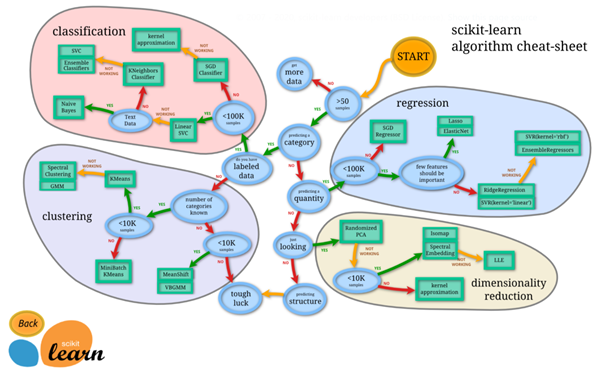

## Table of Contents
### Step 1. Importing the libraries
### Step 2. Importing the dataset
### Step 3. Taking care of missing data using sklearn
### Step 4. Encoding categorical data
#### 4.1 Encoding the Independent Variable (to binary vectors)
#### 4.2 Encoding the Dependent Variable
### Step 5. Splitting the dataset into the Training set and Test set
### Step 6. Feature Scaling

### Note: The Feature Scaling is after Splitting the dataset into the training set and test set to prevent information leakage.

## Step 1. Importing the libraries

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [40]:
%pwd

'C:\\Users\\yumei\\CSP Workshop 2023\\Data'

In [41]:
import os
os.chdir(r'C:\Users\yumei\CSP Workshop 2023\Data')

## Step 2. Importing the dataset

In [42]:
dataset = pd.read_csv('Data.csv')
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [43]:
dataset.shape

(10, 4)

In [44]:
# Create a function to provide data exploratory summary
def df_summary(df,head_size = 5, show_info = True):
    '''print df summary statistics to screen'''
    display(df.shape)
    display(df.head(head_size))
    if show_info:
        display(df.info())
df_summary(dataset)

(10, 4)

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


None

In [45]:
X = dataset.iloc[:, :-1].values  # take all the values of the rows and columns except the last column

In [46]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [47]:
y = dataset.iloc[:, -1].values   # take all the rows and columns for the last column

In [48]:
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


Note: `.values`: 

It returns the values of the columns you are taking (by their index) inside a Numpy array. That is basically
how X and y become Numpy arrays.

### Note: we create X and y separately in Python

Because we want to work with `Numpy` arrays, instead of `Pandas` dataframes. Numpy arrays are the most convenient format to work with when doing data preprocessing and building Machine Learning models. So we create two separate arrays, one that contains our independent variables (also called the input features), and another one that contains our dependent variable (what we want to predict).

### iloc: 

`iloc` locates the row and column by its index. In other words, using `iloc` allows us to take rows and columns by just taking their
index.

## Step 3. Taking care of missing data using sklearn

A few other related functions we have learned from Pandas:

1) Check missings (e.g.: `.isnull()`,`.isna()`)

2) Drop the missings (e.g.: `.dropna()`)

3) Replace the missings by using mean, median, most frequency, simulation, etc. (e.g.: `.fillna()`, `.replace()`)

4) Check and drop duplicates (e.g.: `.drop_duplicates()`)


In [49]:
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [50]:
dataset.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [51]:
dataset.isnull().any(axis=0)

Country      False
Age           True
Salary        True
Purchased    False
dtype: bool

In [52]:
dataset1=dataset['Age'].fillna(value=dataset['Age'].mean())
dataset1

0    44.000000
1    27.000000
2    30.000000
3    38.000000
4    40.000000
5    35.000000
6    38.777778
7    48.000000
8    50.000000
9    37.000000
Name: Age, dtype: float64

In [53]:
dataset['Age'].mean()

38.77777777777778

In [54]:
dataset['Age'] = dataset['Age'].replace(np.NaN,dataset['Age'].mean())
dataset['Salary'] = dataset['Salary'].replace(np.NaN,dataset['Salary'].mean())
dataset

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,63777.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes


In [55]:
dataset['Country'].value_counts()

France     4
Spain      3
Germany    3
Name: Country, dtype: int64

In [56]:
# Import SimpleImputer class
from sklearn.impute import SimpleImputer

# create an object named imputer by calling the SimpleImputer class
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')  

# .fit() method applies imputer on the numeric column age and salary with missings
imputer.fit(X[:, 1:3])    

# .transform() method will replace the missing by the mean and only return the columns updated (Age and Salary)
X[:, 1:3] = imputer.transform(X[:, 1:3])                          

In [57]:
print(dataset)

   Country        Age        Salary Purchased
0   France  44.000000  72000.000000        No
1    Spain  27.000000  48000.000000       Yes
2  Germany  30.000000  54000.000000        No
3    Spain  38.000000  61000.000000        No
4  Germany  40.000000  63777.777778       Yes
5   France  35.000000  58000.000000       Yes
6    Spain  38.777778  52000.000000        No
7   France  48.000000  79000.000000       Yes
8  Germany  50.000000  83000.000000        No
9   France  37.000000  67000.000000       Yes


### Note: Mean is a good strategy but not the best one always. Other strategies include "median" imputation, "most frequent" imputation or prediction imputation. It depends on the business problem, data distribution, and the number of missing values. 

For example, if you have a lot of missing values, then mean substitution is not the best thing. 

Prediction Imputation is actually another great strategy that is recommended but we don't cover here until we learn and understand Classification. After learning Classification, the prediction imputation is the strategy that is even better than mean imputation: 

1. We take the feature column that contains the missing values and we set this feature column as the dependent variable, while setting the other columns as the independent variables. 

2. Then we split the dataset into a Training set and a Test set where the Training set contains all the observations (the lines) where the feature column that we just set as the dependent variable has no missing value, and the Test set contains all the observations where the dependent variable column contains the missing values. 

3. Then we can perform a classification model (a good one for this situation is k-NN) to predict the missing values in the test set. And eventually we replace your missing values by the predictions.

## Step 4. Encoding categorical data

### 4.1 Encoding the Independent Variable

#### Note: In Pandas, 
```python
pd.get_dummies(df['col'], drop_first=True)
```

In [58]:
#from sklearn.compose import ColumnTransformer
#labelencoder_X = LabelEncoder()
#X[:,0] = labelencoder_X.fit_transform(X[:,0])
#ct = ColumnTransformer(transformers=[("Country", OneHotEncoder(), [0])], remainder = 'passthrough')
#X = ct.fit_transform(X)

In [59]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [60]:
# One Hot Encoding consists of creating binary vectors for each of the classes (countries in the data)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# keep all other columns using remainder='passthrough'
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')

# fit and transform at once; future machine learning model will expect numpy array
X = np.array(ct.fit_transform(X))  


In [61]:
#X = ct.fit_transform(X)

In [62]:
X

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [63]:
print(X)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


### 4.2 Encoding the Dependent Variable

In [64]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [66]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


## Step 5. Splitting the dataset into the Training set and Test set
note: add some tables

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [69]:
print(X_train)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [70]:
print(X_test)

[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [71]:
print(y_train)

[0 1 0 0 1 1 0 1]


In [72]:
print(y_test)

[0 1]


## Step 6. Feature Scaling

- Put all the features on the same scale to avoid some features dominate others so that other features wouldn't be considered in the machine learning models

- Don't always need this tool as the parameter estimates would compensate the scales accordingly

- Don't apply to dummy features

- **Question**: Feature scaling before or after dataset splitting into training and testing datasets?

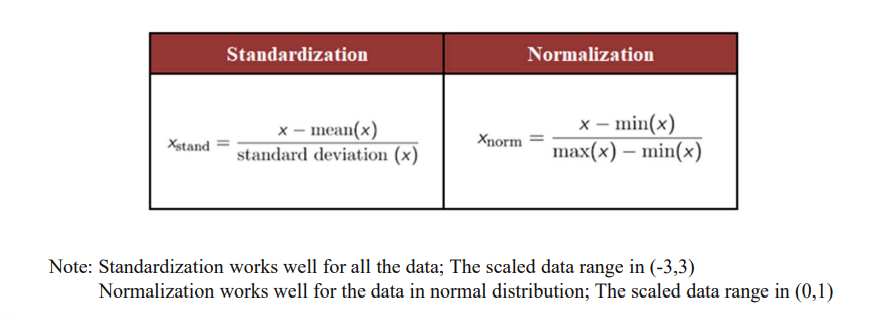

In [73]:
# from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])  # apply (transform) the same scale (fit) from training data

In [74]:
print(X_train)

[[0.0 0.0 1.0 -0.19159184384578545 -1.0781259408412425]
 [0.0 1.0 0.0 -0.014117293757057777 -0.07013167641635372]
 [1.0 0.0 0.0 0.566708506533324 0.633562432710455]
 [0.0 0.0 1.0 -0.30453019390224867 -0.30786617274297867]
 [0.0 0.0 1.0 -1.9018011447007988 -1.420463615551582]
 [1.0 0.0 0.0 1.1475343068237058 1.232653363453549]
 [0.0 1.0 0.0 1.4379472069688968 1.5749910381638885]
 [1.0 0.0 0.0 -0.7401495441200351 -0.5646194287757332]]


In [75]:
print(X_test)

[[0.0 1.0 0.0 -1.4661817944830124 -0.9069571034860727]
 [1.0 0.0 0.0 -0.44973664397484414 0.2056403393225306]]


### Note: the difference between fit and transform in Python:
The fit/train part is used to extract some info of the data on which the object is applied (here, Imputer will
spot the missing values and get the mean of the column). Then, the transform part is used to apply some
transformation (here, Imputer will replace the missing value by the mean).

#### The course materials are developed mainly based on my personal experience and contributions from the Python learning community. 

Referred Books: 
- Learning Python, 5th Edition by Mark Lutz
- Python Data Science Handbook, Jake, VanderPlas
- Python for Data Analysis, Wes McKinney 

Copyright ©2023 Mei Najim. All rights reserved.  